# Chess Enryption Algorithm

In [31]:
import chess.pgn , io , pandas , re , math , random , os

print_status=False
games=[]
white_games=[]
black_games=[]
files_list=os.listdir('games_database')
if(print_status):
    print(f"Total files in directory are {files_list}")
    print(f"File count {len(files_list)}")


def rand(lower,upper):
    #upper and lower are both inclusive
    return random.randint(lower,upper)

def generate_repo(file):
    pgn=open(file,encoding="utf-8")
    game=chess.pgn.read_game(pgn)
    if(print_status):
        print("Game metadata !")
        print(game)
    
        print("\n")
    
    mainline = game.mainline()
    mainline=str(mainline)
    text=mainline
    pattern='\d*\. ([a-z1-9A-Z+]*)'
    white=re.findall(pattern,text)
    if(print_status):
        print("white moves")
        print(white)
    white_games.append(white)
    pattern='\d*\. [a-z1-9A-Z+]* ([a-z1-9A-Z+]*)'
    black=re.findall(pattern,text)
    if(print_status):
        print("Black moves")
        print(black)
    black_games.append(black)

def parse_files():
    header="games_database/"
    i=1
    for file in files_list:
        if(print_status):
            print("\n\nGame: ",i)
        generate_repo(header+file)
        i+=1
        
        
parse_files()
games.append(white_games)
games.append(black_games)
if(print_status):
    print(f"3d array of games {games}")
# description games => white_games , black_games
# in white_games array all 10 games of white moves are stored 
# in game 1 we will find all moves of white of game 1

def generate_TLA():
    #requirements => 3 random variables
    # var 1 => select white or black => 0 for white and 1 for black
    # var 2 => select game number => from 1 to to total number of games 
    # var 3 => select a move number for that particular game => from move1 to last move of the game
    # TLA => Nc5 is a 3 letter abbrevation for the particular chess move [played]
    var1=rand(0,1)
    bound1=len(games[var1])
    var2=rand(1,bound1)-1
    bound2=len(games[var1][var2])
    var3=rand(1,bound2)-1
    TLA=games[var1][var2][var3]
    if(print_status):
        print(f"Three Letter Abbrevation obtained is: {TLA}")
    return TLA
    
    
def generate_encryption_String(n):
    #let n be the length of encryption string requires
    encryption_String=''
    for i in range(n):
        encryption_String+=generate_TLA()
    print(f"Generated encryption String is: {encryption_String}")
    
generate_encryption_String(32)



Generated encryption String is: g6h7Ba4Re7+Bf8c4cxb3Rxf6e4Qxd4Nd7Be3h4g3Rhc1Nxg5h5Nbd7e6Kh8Bxe3Bg2h4Qd6Rc1Rf5Bc2Rg2+Ba2Qg4+Nf4+Re8


Probablity that the same code encryptio  text is generated for the second time is
10^-98

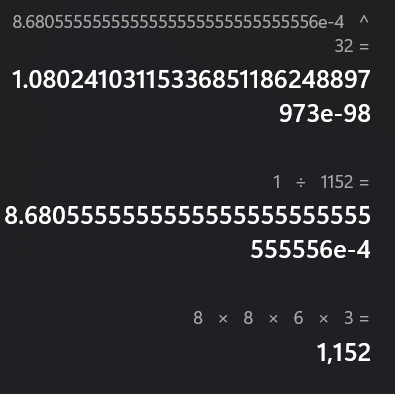